# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

ModuleNotFoundError: No module named 'LaTeX'

In [2]:
print(mouse_metadata.shape)
mouse_metadata = mouse_metadata.rename(columns={'Age_months': 'Age (months)'})
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine data and preview
mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
mouse_df.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30
1892,b879,45,72.555239,2,Stelasyn,Female,4,26


In [5]:
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age (months)        1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [6]:
# Look for n
mouse_df["Mouse ID"].nunique()

249

In [7]:
# Gather all the dups
mouse_df.groupby(["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [8]:
# Optional: Review data of dup mouse IDs: "a203", "q633", "q610", "g989".
mask = mouse_df["Mouse ID"] == "g989"
mouse_df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = mouse_df["Mouse ID"] != "g989"
mouse_unique = mouse_df.loc[mask].reset_index(drop=True)

mouse_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age (months)        1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_unique["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Summarry statsistics where drug regimen is indexed and mean, median, var, std, and sem of tumor volume is in a column.
mouse_unique.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

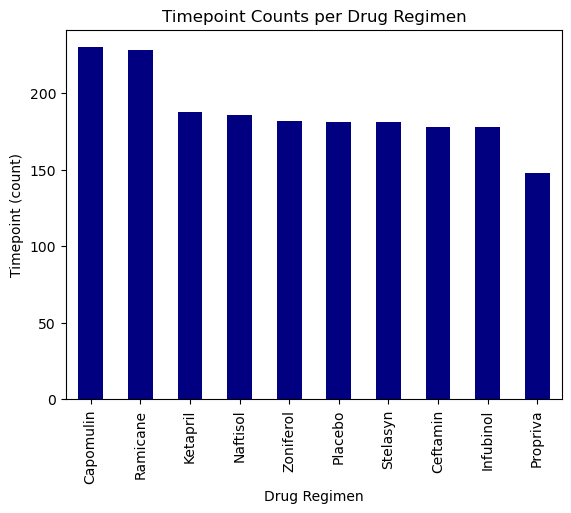

In [12]:
# Bar chart Mouse ID vs Timepoints via Pandas DataFrame.plot()
mouse_unique.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Timepoint Counts per Drug Regimen", ylabel="Timepoint (count)", color="navy")
plt.show()

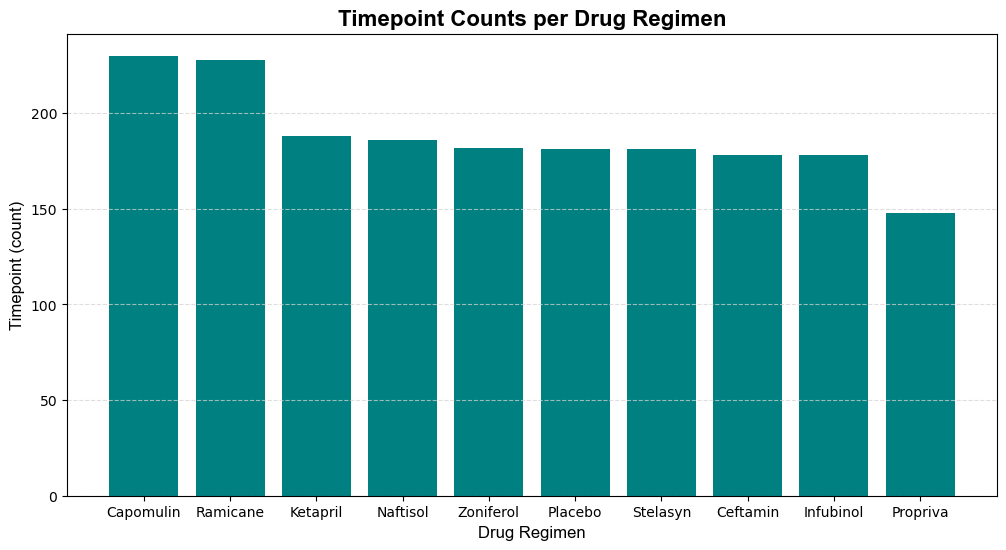

In [13]:
# Bar chart Mouse ID vs Timepoints via Matplotlibs pyplot

# Group data by Drug Regimen (x-axis)
Drug_grouped = mouse_unique.groupby("Drug Regimen").size().sort_values(ascending=False)

# Set Canvas Size
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(Drug_grouped.index, Drug_grouped.values, color="teal", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Timepoint (count)", fontfamily="Arial", fontsize=12)
plt.title("Timepoint Counts per Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 250)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

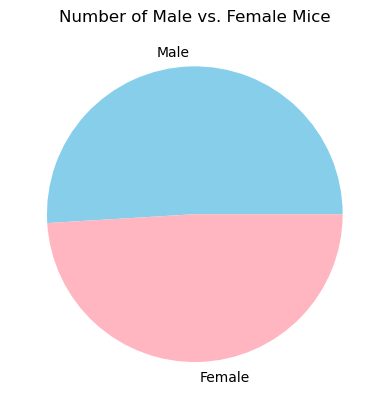

In [14]:
# Pie chart unique mice male vs female via Pandas DataFrame.plot()
mouse_unique.groupby("Sex").size().sort_values(ascending=False).plot(kind="pie", title="Number of Male vs. Female Mice", colors=["skyblue", "lightpink"])
plt.show()


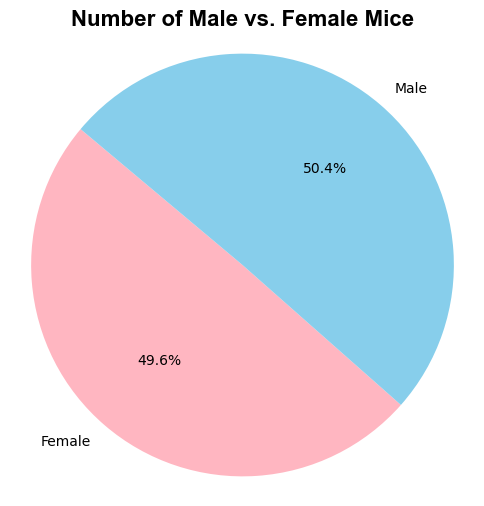

In [33]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

mouse_sex = mouse_unique.groupby("Sex")['Mouse ID'].nunique()

# Make the pie chart
# Change Canvas Size
plt.figure(figsize=(6, 6))

# Create a basic plot
plt.pie(mouse_sex, labels=["Female", "Male"], colors=["lightpink", "skyblue"],
        autopct="%1.1f%%", shadow=False, startangle=140)

# Add Labels/Title
plt.title("Number of Male vs. Female Mice", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.axis("equal")

# Show/Save the Graph
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
Drug_grouped.head()

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
dtype: int64

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_unique.groupby(["Mouse ID"])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = last_timepoint.merge(mouse_unique,on=['Mouse ID','Timepoint'],how="left")

In [38]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_regimen:
    final_tumor_volume = tumor_volume.loc[tumor_volume["Drug Regimen"] ==drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_volume)

    quartiles = final_tumor_volume.quantile([.25, .5, .75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inner_quartile = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * inner_quartile)
    upper_bound = upper_quartile + (1.5 * inner_quartile)
    outlier = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug}'s outliers: {outlier}")
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/bw/f8rp5syd2lq98wb4b23814vm0000gn/T/ipykernel_4301/466478543.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_list, labels = drug_regimen, flierprops = outliers)


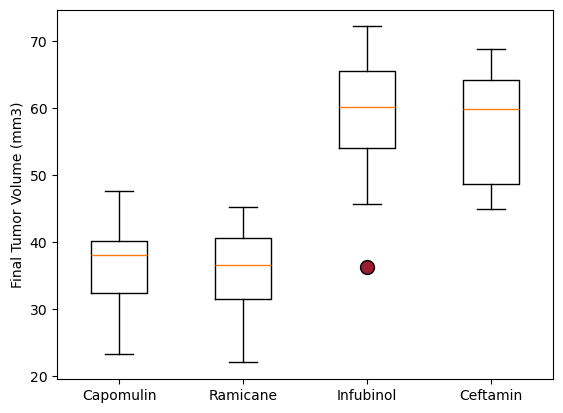

In [48]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
outliers = dict(markerfacecolor = '#9B1B30', markersize = 10)
plt.boxplot(tumor_vol_list, labels = drug_regimen, flierprops = outliers)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

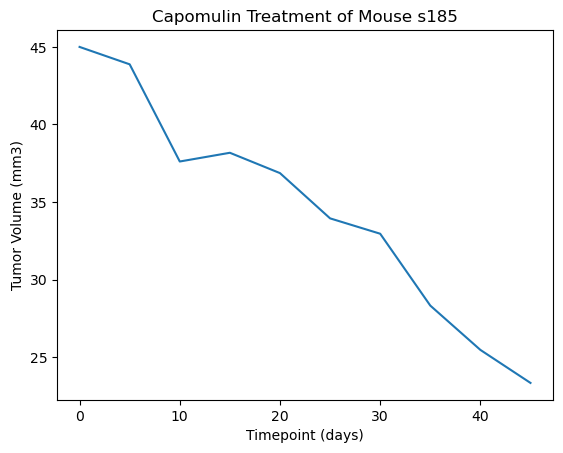

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = mouse_unique.loc[mouse_unique['Drug Regimen'] == "Capomulin"]
single_mouse = capomulin.loc[capomulin['Mouse ID'] == 's185']
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse s185')
plt.show()

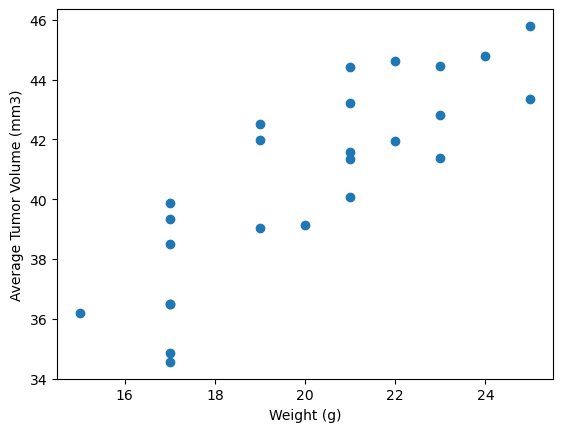

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_unique.loc[mouse_unique['Drug Regimen'] == "Capomulin"]
capomulin_avg_tumor_vol = capomulin.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'],capomulin_avg_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between individual mouse weight (g) and average tumor volume (mm3) is r=0.84


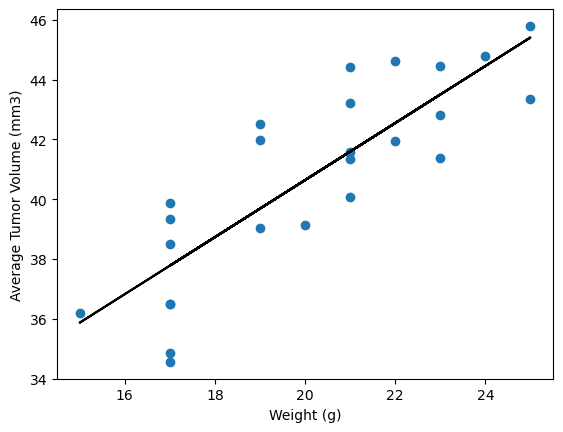

In [59]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
r =round(st.pearsonr(capomulin_avg_tumor_vol['Weight (g)'],capomulin_avg_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between individual mouse weight (g) and average tumor volume (mm3) is r={r}")
model = st.linregress(capomulin_avg_tumor_vol['Weight (g)'],capomulin_avg_tumor_vol['Tumor Volume (mm3)'])

y_values = capomulin_avg_tumor_vol['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'],capomulin_avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(capomulin_avg_tumor_vol['Weight (g)'],y_values,color="black")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()